In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import librosa
from IPython.display import Audio

In [12]:
def load_audio(path, verbose=False):
    audio, sr = librosa.load(path, sr=16_000)

    return audio, sr

def make_plot(audio_array, sample_rate):
    plt.figure().set_figwidth(14)
    librosa.display.waveshow(audio_array, sr=sample_rate)

    ## Espectograma
    D = librosa.stft(audio_array)
    # Convert the complex-valued result to magnitude
    S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
    # Display the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
    # plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

In [13]:
marcaciones = pd.read_excel("bd_expertos.xlsx", sheet_name=None)
marcaciones = {key:marcaciones[key] for key in marcaciones if len(marcaciones[key]) > 0}
df_asignacion = marcaciones.pop("Asignacion")

# Iterate through each DataFrame in the dictionary
for sheet_name, df in marcaciones.items():
    # Remove leading and trailing whitespaces from column names
    df.columns = df.columns.str.strip()


In [14]:
marcaciones.keys()

dict_keys(['Sheet2', 'Sheet4', 'Sheet5', 'Sheet6', 'Sheet7'])

In [15]:
data_final = pd.concat(marcaciones.values(), ignore_index=True)

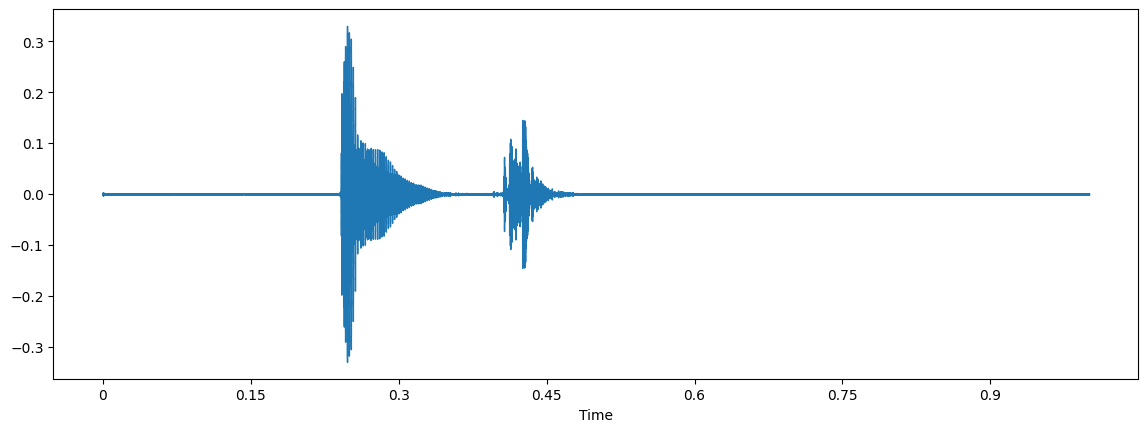

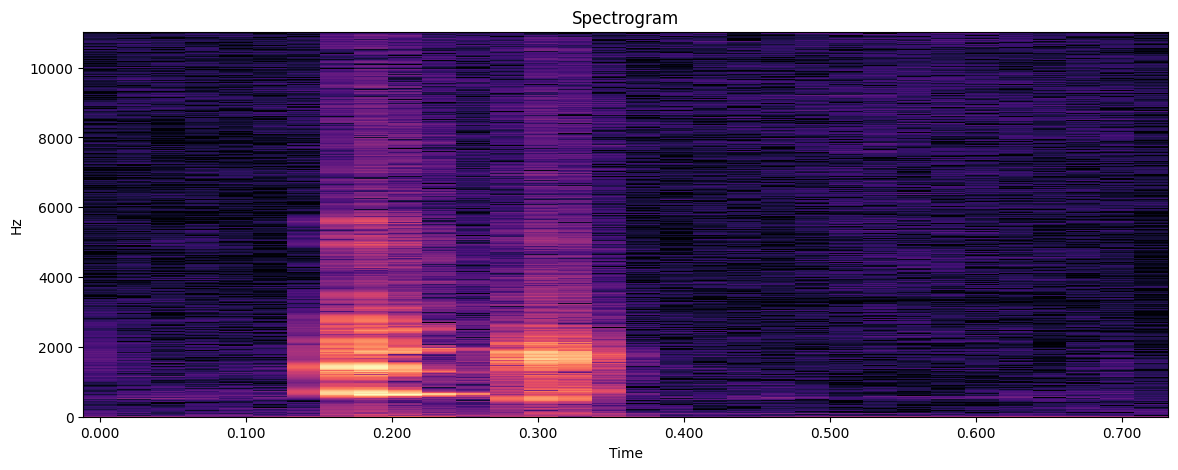

In [19]:
path = data_final.loc[27, 'Audio']
audio, sr = load_audio(path)

make_plot(audio, sr)
Audio(data=audio, rate=sr)

In [17]:
data_final.query("Tipo == 'Generado'")['Calificación'].value_counts(True)

Real        0.6
Generado    0.4
Name: Calificación, dtype: float64

In [18]:
data_final.query("Tipo == 'Real'")['Calificación'].value_counts(True)

Real        0.7
Generado    0.3
Name: Calificación, dtype: float64

In [21]:
keys = list(marcaciones.keys())
data = marcaciones[keys[1]][['Tipo', 'Calificación']]

In [25]:
only_gen = data.query("Tipo == 'Generado'")
only_gen['Calificación'].value_counts(True)

Generado    0.6
Real        0.4
Name: Calificación, dtype: float64

In [ ]:
pd.pivot_table()

In [7]:
# marcaciones

In [4]:
marcaciones_reales = {key:marcaciones[key] for key in marcaciones if marcaciones[key].Tipo[0] == "Real"}
marcaciones_generadas = {key:marcaciones[key] for key in marcaciones if marcaciones[key].Tipo[0] != "Real"}

In [5]:
count_reales_in_gen = [(df["Calificación"] == "Real").sum() for _, df in marcaciones_generadas.items()]
count_reales_in_real = [(df["Calificación"] == "Real").sum() for _, df in marcaciones_reales.items()]

In [6]:
mean_real_in_gen = np.mean(count_reales_in_gen)
mean_real_in_real = np.mean(count_reales_in_real)
var_real_in_gen = np.var(count_reales_in_gen)
var_real_in_real = np.var(count_reales_in_real)

df = len(count_reales_in_real) + len(count_reales_in_gen) - 1

In [7]:
from scipy import stats
stats.ttest_ind(count_reales_in_gen, count_reales_in_real)

TtestResult(statistic=-0.16591842323322537, pvalue=0.8687981648598583, df=58.0)

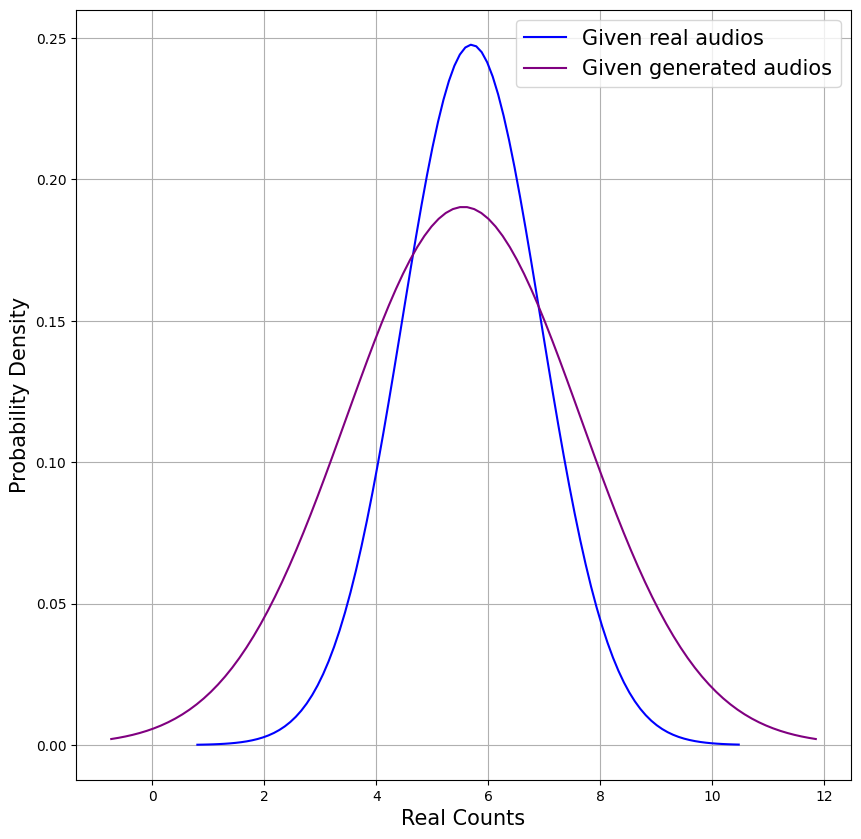

In [19]:
sigma_1 = np.sqrt(var_real_in_gen)
x_1 = np.linspace(mean_real_in_gen - 3*sigma_1, mean_real_in_gen + 3*sigma_1, 100) 
y_1 = norm.pdf(x_1, mean_real_in_gen, sigma_1)


sigma_2 = np.sqrt(var_real_in_real)
x_2 = np.linspace(mean_real_in_real - 3*sigma_2, mean_real_in_real + 3*sigma_2, 100) 
y_2 = norm.pdf(x_1, mean_real_in_real, sigma_2)

plt.figure(figsize=(10, 10))
# Create the plot
plt.plot(x_2, y_2, c="blue", label="Given real audios")
plt.plot(x_1, y_1, c="purple", label="Given generated audios")
plt.xlabel('Real Counts', fontsize=15)
plt.ylabel('Probability Density', fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)
# Show the plot
plt.show()